# Week 5 Lab: Edge Detection

Data Analytics at Scale 2018

# Background

* The purpose of this lab is to implement one edge detection algorithm in several ways and compare them.
* Edge detection is basically the process of finding discontinuities in an image: points where the brightness of the image changes.
* We will deal with a greyscale image.
* We will profile and benchmark each approach. 
* We will also ensure that all approaches produce identical results.


The algorithm we will implement is the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

Each pixel in the image is transformed to become a weighted sum of its neighbors (and itself).

To find vertical edges, we use the following weights:
$$
\left(\begin{array}{cc} 
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right)
$$ 

where the pixel of interest is at the centre position.

Horizontal edges are found with the following weights where, again, the pixel of interest is located at the centre of the matrix:
$$
\left(\begin{array}{cc} 
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right)
$$ 

So for a pixel of the image $img$ located at position $[i,j]$, we have:

```
s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +
   img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +
   img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
```
 using the first set of weights and a similar sum ``s2`` using the second set of weights.
 
The combined pixel value for $[i,j]$ is:
$$
\sqrt(s1^2+s2^2)
$$

Finally, a threshold operation is often performed. This simply sets all values below a given number to zero. More formally,
$$
img[i,j]=\begin{cases}
0 & img[i,j]\le threshold\\
img[i,j] & img[i,j] > threshold
\end{cases}
$$
for all $i,j$. For this lab, the threshold will be 70.

# Pure Python, benchmarking, and profiling exercises

## Exercise: Write out the sum s2

Please write out the sum ``s2`` for a pixel of image ``img``located at positoin $[i,j]$ using the second set of weights above:


Enter your solution below.

```
s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 +
   img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
```

## Exercise: Calculate values for one pixel

Please calculate the $s_1$ and $s_2$ for pixel $100,100$ of the following image. Please also produce the combined value: $\sqrt(s_1^2+s_2^2)$.


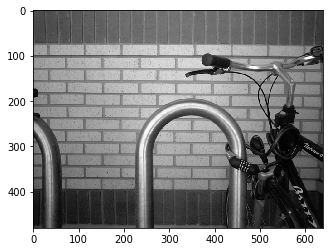

In [1]:
#Code to import the image. Do not change
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import pickle

img=mpimg.imread('Bikesgray.jpg')
plt.imshow(img,cmap='gray')
plt.show()

In [2]:
#Complete the following function to find the value of the pixel at location 100,100
def sobel_pixel(img,i=100,j=100):
    s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
       img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
       img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
    s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
    combined_value=(s1**2+s2**2)**0.5 #combination of s1 and s2 as described above
    
    return s1,s2,combined_value

In [3]:
#Check your answer by running the following code.
s1,s2,combined=sobel_pixel(img)
assert s1==1, "s1 value is not correct"
assert s2==57, "s2 value is not correct"
assert abs(combined-57.008)<0.001, "final value  is not correct"
print("Your output is correct.")

Your output is correct.


## Exercise: Sobel in Python

* Please implement a function ``sobel_py`` that accepts a greyscale image and returns the result of applying Sobel edge detection.
* The function should be written in pure python and **not** use any numpy functions (the existing code is acceptable).
* To get you started some starting code is provided.
* It is not possible to calculate the pxiels on the border of the image. Please set these pixels to zero.

In [4]:
#Complete the following function
def sobel_py(img):    
    rows=img.shape[0]
    cols=img.shape[1]
    
    mag=np.zeros(img.shape) #image to be returned
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
               img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
               img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
            s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
            mag[i][j]=(s1**2+s2**2)**0.5
    
    threshold=70
    for i in range(rows):
        for j in range(cols):
            #apply threshold to mag
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag

In [5]:
#Complete the following function

#An alernative solution
def sobel_py2(img):
    Gx=[[-1,0,1],[-2,0,2],[-1,0,1]]
    Gy=[[-1,-2,-1],[0,0,0],[1,2,1]]
    
    rows=img.shape[0]
    cols=img.shape[1]
    
    mag=np.zeros(img.shape) #image to be returned
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=0
            s2=0
            for k in range(-1,2):
                for l in range(-1,2):
                    s1+=Gx[k+1][l+1]*img[i+k,j+l]
                    s2+=Gy[k+1][l+1]*img[i+k,j+l]                    

            mag[i][j]=(s1**2+s2**2)**0.5
    
    threshold=70
    for i in range(rows):
        for j in range(cols):
            #apply threshold to mag
            if mag[i,j]<=threshold:
                mag[i,j]=0
    
    return mag

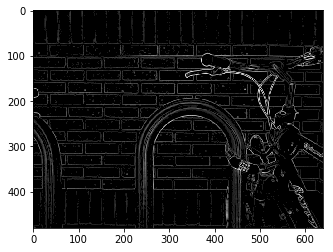

Great work


In [6]:
#Check your output. If "Great work" prints you have competed the exercise correctly.
img_check=pickle.load(open("sobel.pickle","rb"))
img_computed=sobel_py(img)
plt.imshow(img_computed,cmap='gray')
plt.show()
assert np.all(abs(img_check-img_computed)<1), "Images do not match"
print("Great work")

## Exercise: Benchmark your code using timeit

In [7]:
%timeit -n 10 sobel_py(img)
%timeit -n 10 sobel_py2(img)

8.51 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.7 s ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Exercise: Profile your code using cProfile

In [8]:
%prun sobel_py(img)

         5 function calls in 8.446 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    8.445    8.445    8.446    8.446 <ipython-input-4-b3336c487dd2>:2(sobel_py)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
        1    0.000    0.000    8.446    8.446 {built-in method builtins.exec}
        1    0.000    0.000    8.446    8.446 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Exercise: Profile your code using line_profiler

In [9]:
#Using Jupyter magic
%load_ext line_profiler
%lprun -f sobel_py sobel_py(img)

Timer unit: 1e-06 s

Total time: 9.63028 s
File: <ipython-input-4-b3336c487dd2>
Function: sobel_py at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def sobel_py(img):    
     3         1          3.0      3.0      0.0      rows=img.shape[0]
     4         1          0.0      0.0      0.0      cols=img.shape[1]
     5                                               
     6         1        210.0    210.0      0.0      mag=np.zeros(img.shape) #image to be returned
     7                                               
     8       479        202.0      0.4      0.0      for i in range(1,rows-1):
     9    305442     142238.0      0.5      1.5          for j in range(1,cols-1):
    10    304964    4812976.0     15.8     50.0              s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +               img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +               img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
    11    

**NB** I was surprised to see the difference in time spent between s1 and s2 for this approach. This looks like it could be because I deleted the multiply zero lines from s2, but not from s1. It should be posisble to speed this up by removing the *0 terms.

Using an external file, I did the following.

I first put the this code in a file called py_soble.py

```
@profile
def sobel_py(img):    
    rows=img.shape[0]
    cols=img.shape[1]
    
    mag=np.zeros(img.shape) #image to be returned
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
               img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
               img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
            s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
            mag[i][j]=(s1**2+s2**2)**0.5
    
    threshold=70
    for i in range(rows):
        for j in range(cols):
            #apply threshold to mag
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag

if __name__=="__main__":
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    
    img=mpimg.imread('Bikesgray.jpg')
    sobel_py(img)
```

I then run the following commands and recieve the associated outut.

```
$ kernprof -l py_sobel.py
Wrote profile results to py_sobel.py.lprof

$ python -m line_profiler py_sobel.py.lprof 
Timer unit: 1e-06 s

Total time: 9.77296 s
File: py_sobel.py
Function: sobel_py at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           @profile
     2                                           def sobel_py(img):    
     3         1          4.0      4.0      0.0      rows=img.shape[0]
     4         1          1.0      1.0      0.0      cols=img.shape[1]
     5                                               
     6         1          8.0      8.0      0.0      mag=np.zeros(img.shape) #image to be returned
     7                                               
     8       479        206.0      0.4      0.0      for i in range(1,rows-1):
     9    305442     145452.0      0.5      1.5          for j in range(1,cols-1):
    10                                                       s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
    11                                                          img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
    12    304964    4885162.0     16.0     50.0                 img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
    13    304964    3295892.0     10.8     33.7              s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
    14    304964    1006588.0      3.3     10.3              mag[i][j]=(s1**2+s2**2)**0.5
    15                                               
    16         1          1.0      1.0      0.0      threshold=70
    17       481        184.0      0.4      0.0      for i in range(rows):
    18    307680     119693.0      0.4      1.2          for j in range(cols):
    19                                                       #apply threshold to mag
    20    307200     205335.0      0.7      2.1              if mag[i,j]<=threshold:
    21    227181     114433.0      0.5      1.2                  mag[i,j]=0
    22         1          1.0      1.0      0.0      return mag

```

## Exercise: Profile your code using memory_profiler

In [10]:
%%file py_sobel.py

@profile
def sobel_py(img):    
    rows=img.shape[0]
    cols=img.shape[1]

    mag=np.zeros(img.shape) #image to be returned

    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
               img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
               img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
            s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
            mag[i][j]=(s1**2+s2**2)**0.5

    threshold=70
    for i in range(rows):
        for j in range(cols):
            #apply threshold to mag
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag

if __name__=="__main__":
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np

    img=mpimg.imread('Bikesgray.jpg')
    sobel_py(img)

Overwriting py_sobel.py


In [11]:
!~/anaconda3/bin/python -m memory_profiler  py_sobel.py

Filename: py_sobel.py

Line #    Mem usage    Increment   Line Contents
     2   74.879 MiB   74.879 MiB   @profile
     3                             def sobel_py(img):    
     4   74.879 MiB    0.000 MiB       rows=img.shape[0]
     5   74.879 MiB    0.000 MiB       cols=img.shape[1]
     6                             
     7   74.879 MiB    0.000 MiB       mag=np.zeros(img.shape) #image to be returned
     8                             
     9   76.992 MiB    0.000 MiB       for i in range(1,rows-1):
    10   76.992 MiB    0.000 MiB           for j in range(1,cols-1):
    11                                         s1=img[i-1,j-1]*-1 + img[i-1,j]*0 + img[i-1,j+1]*1 +\
    12                                            img[i,j-1]*-2 + img[i,j]*0 + img[i,j+1]*2 +\
    13   76.992 MiB    0.000 MiB                  img[i+1,j-1]*-1 + img[i+1,j]*0 + img[i+1,j+1]*1
    14   76.992 MiB    0.000 MiB               s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,

# Numpy exercises

## Exercise: Implement sobel with numpy

Implement the sobel edge detection algorithm using as efficiently as possible using numpy.

In [12]:
#Complete the following function
def sobel_numpy(img):
    Gx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Gy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    
    rows=img.shape[0]
    cols=img.shape[1]
    
    mag=np.zeros(img.shape)
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            #Use numpy!
            s1=(Gx*img[i-1:i+2,j-1:j+2]).sum()
            s2=(Gy*img[i-1:i+2,j-1:j+2]).sum()
            mag[i,j]=(s1**2+s2**2)**0.5
    
    threshold=70
    #apply threshold. Hint: Look at np.vectorize
    f=np.vectorize(lambda x: 0 if x<=threshold else x)
    mag=f(mag)    

    return mag



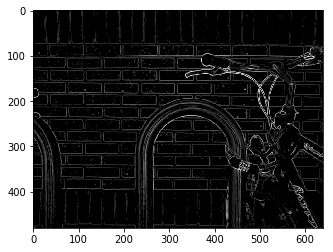

Great work


In [13]:
#Check your output. If "Great work" prints you have competed the exercise correctly.
img_check=pickle.load(open("sobel.pickle","rb"))
img_computed=sobel_numpy(img)
plt.imshow(img_computed,cmap='gray')
plt.show()
assert np.all(abs(img_check-img_computed)<1), "Images do not match"
print("Great work")

## Exercise: Benchmark your numpy version.

Use timeit. Compare the results to sobel_py. 

In [14]:
%timeit sobel_py(img)
%timeit sobel_numpy(img)

8.31 s ± 40.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Bonus/Optional:
* Read https://github.com/alisaaalehi/convolution_as_multiplication/blob/master/Convolution_as_multiplication.ipynb
* Can you implement sobel edge detection using matrix multiplication?

# C-compiled code

## Exercise: Numba

Use numba to improve the performance of sobel edge detection.


In [15]:
#Import
from numba import jit 

@jit
def sobel_numba(img):
    Gx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Gy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    
    rows=img.shape[0]
    cols=img.shape[1]
    
    mag=np.zeros(img.shape)
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=(Gx*img[i-1:i+2,j-1:j+2]).sum()
            s2=(Gy*img[i-1:i+2,j-1:j+2]).sum()
            mag[i,j]=(s1**2+s2**2)**0.5
    
    threshold = 70 #varies for application [0,255]
    #If any value in mag is less than threshold, set it to zero. Otherwise leave as is.
    for i in range(rows):
        for j in range(cols):
            if mag[i][j]<=threshold:
                mag[i][j]=0
    return mag



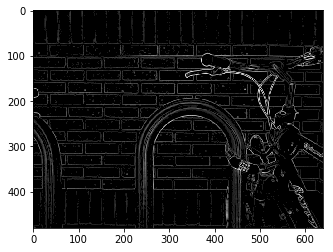

Great work


In [16]:
#Check your output. If "Great work" prints you have competed the exercise correctly.
img_check=pickle.load(open("sobel.pickle","rb"))
img_computed=sobel_numba(img)
plt.imshow(img_computed,cmap='gray')
plt.show()
assert np.all(abs(img_check-img_computed)<1), "Images do not match"
print("Great work")

## Exercise: Benchmark sobel_numbra

Use timit

In [17]:
%%timeit sobel_numba(img)
sobel_numba(img)


90.7 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Exercise: Cython

Implement Sobel edge detection in Cython.

This is the hardest exercise. Some hints:
* You can use ``%%cython -a `` to see where python is still being used
* The numpy array containing the image is read-only and uses unsigned bytes. The correct method signature is given in the code.
* Surprisingly, sobel_py may provide the best starting point.
* I have given some code with ``prange(...,nogil=True)``. We will talk more about this next week. For now, you just need to add start and/or end values in place of ``...`` in the same way as the standard Python ``range(...)`` function.
* You will need to install Cython. The easiest way to do this will be with ``conda``. Please try the following in the terminal / anaconda console:
```
 conda install -c anaconda cython 
```


In [18]:
%load_ext Cython

In [19]:
%%cython

cimport cython
cimport numpy as c_np
from libc.math cimport sqrt


import numpy as np

#Consider @cython annotations to disable boundschecking and wraparound, etc. (do this at the end!)
@cython.boundscheck(False)
@cython.wraparound(False)
#img is read-only, which means memoryview must be delcared const (else runtime error) - https://cython.readthedocs.io/en/latest/src/userguide/memoryviews.html#read-only-views
def sobel_cython(const c_np.uint8_t[:,:] img):
    
    cdef int[3][3] Gx=[[-1,0,1],[-2,0,2],[-1,0,1]]
    cdef int[3][3] Gy=[[-1,-2,-1],[0,0,0],[1,2,1]]
        
    #Get the number of rows and columns for img
    cdef int rows = img.shape[0]
    cdef int cols = img.shape[1]
    
    cdef double[:,:] mag=np.zeros((rows,cols), dtype=np.double)
    
    #declare all needed values before the loop and set initial values (e.g., 0)
    cdef int i=0,j=0,s1=0,s2=0
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            s1=img[i-1,j-1]*-1 + img[i-1,j+1]*1 +\
               img[i,j-1]*-2 + img[i,j+1]*2 +\
               img[i+1,j-1]*-1 + img[i+1,j+1]*1
            s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
            mag[i][j]=sqrt(s1*s1+s2*s2)
    
    cdef int threshold = 70 #varies for application [0 255]
    for i in range(rows):
        for j in range(cols):
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag


In [20]:
%%cython

cimport cython
cimport numpy as c_np
from libc.math cimport sqrt

import numpy as np

#Consider @cython annotations to disable boundschecking and wraparound, etc. (do this at the end!)
@cython.boundscheck(False)
@cython.wraparound(False)
#img is read-only, which means memoryview must be delcared const (else runtime error) - https://cython.readthedocs.io/en/latest/src/userguide/memoryviews.html#read-only-views
def sobel_cython2(const c_np.uint8_t[:,:] img):
    
    cdef int[3][3] Gx=[[-1,0,1],[-2,0,2],[-1,0,1]]
    cdef int[3][3] Gy=[[-1,-2,-1],[0,0,0],[1,2,1]]
        
    #Get the number of rows and columns for img
    cdef int rows = img.shape[0]
    cdef int cols = img.shape[1]
    
    cdef double[:,:] mag=np.zeros((rows,cols), dtype=np.double)
    
    #declare all needed values before the loop and set initial values (e.g., 0)
    cdef int i=0,j=0,k=0,l=0
    cdef int s1=0, s2=0
    for i in range(1,rows-1):#Note I am not using prange here!
        for j in range(1,cols-1): 
            s1=0
            s2=0
            for k in range(-1,2):
                for l in range(-1,2):
                    s1+=Gx[k+1][l+1]*img[i+k,j+l]
                    s2+=Gy[k+1][l+1]*img[i+k,j+l]
            mag[i][j]=sqrt(s1*s1+s2*s2)
    
    cdef int threshold = 70 #varies for application [0 255]
    for i in range(rows):
        for j in range(cols): #Note, I am not using prange here.
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag


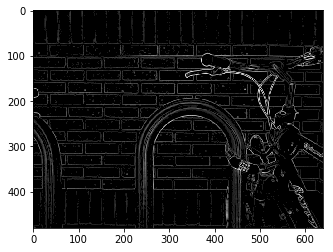

Great work


In [21]:
#Check your output. If "Great work" prints you have competed the exercise correctly.
img_check=pickle.load(open("sobel.pickle","rb"))
img_computed=sobel_cython(img)
plt.imshow(img_computed,cmap='gray')
plt.show()
assert np.all(abs(img_check-img_computed)<1), "Images do not match"

img_computed=sobel_cython2(img)
assert np.all(abs(img_check-img_computed)<1), "Images do not match - cython2"

print("Great work")

## Exercise: Benchmark Cython

Use timeit


In [22]:
%timeit sobel_cython(img)
%timeit sobel_cython2(img)

2.17 ms ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.19 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Bonus/Optional:

What is the best runtime you can achieve on this image with any approach. Spend time trying to optimise approaches (especially cython).

My best runtime was with Cython where I achieved:
```
2.32 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```


### Cython parallel
The following code uses prange and the OpenMP to run some opperations in parallel. 

**Note** I only use `prange(...)` on the outer loop. Using prange on the inner loop results in more overhead than is beneficial (as we will see this week!)

In [23]:
%%cython
# distutils: extra_compile_args=-fopenmp
# distutils: extra_link_args=-fopenmp

cimport cython
cimport numpy as c_np
from libc.math cimport sqrt
from cython.parallel import prange

import numpy as np

#Consider @cython annotations to disable boundschecking and wraparound, etc. (do this at the end!)
@cython.boundscheck(False)
@cython.wraparound(False)
#img is read-only, which means memoryview must be delcared const (else runtime error) - https://cython.readthedocs.io/en/latest/src/userguide/memoryviews.html#read-only-views
def sobel_cython_parallel(const c_np.uint8_t[:,:] img):
    
    cdef int[3][3] Gx=[[-1,0,1],[-2,0,2],[-1,0,1]]
    cdef int[3][3] Gy=[[-1,-2,-1],[0,0,0],[1,2,1]]
        
    #Get the number of rows and columns for img
    cdef int rows = img.shape[0]
    cdef int cols = img.shape[1]
    
    cdef double[:,:] mag=np.zeros((rows,cols), dtype=np.double)
    
    #declare all needed values before the loop and set initial values (e.g., 0)
    cdef int i=0,j=0,s1=0,s2=0
    for i in prange(1,rows-1,nogil=True):
        for j in range(1,cols-1): #Note I am not using prange here!
            s1=img[i-1,j-1]*-1 + img[i-1,j+1]*1 +\
               img[i,j-1]*-2 + img[i,j+1]*2 +\
               img[i+1,j-1]*-1 + img[i+1,j+1]*1
            s2=img[i-1,j-1]*-1 + img[i-1,j]*-2 + img[i-1,j+1]*-1 + img[i+1,j-1]*1 + img[i+1,j]*2 + img[i+1,j+1]*1
            mag[i][j]=sqrt(s1*s1+s2*s2)
    
    cdef int threshold = 70 #varies for application [0 255]
    for i in prange(rows,nogil=True):
        for j in range(cols): #Note I am not using prange here!
            if mag[i,j]<=threshold:
                mag[i,j]=0
    return mag


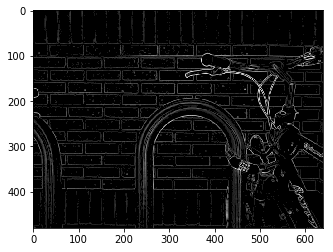

Great work


In [24]:
#Check your output. If "Great work" prints you have competed the exercise correctly.
img_check=pickle.load(open("sobel.pickle","rb"))
img_computed=sobel_cython_parallel(img)
plt.imshow(img_computed,cmap='gray')
plt.show()
assert np.all(abs(img_check-img_computed)<1), "Images do not match"
print("Great work")

In [25]:
%timeit sobel_cython_parallel(img)

658 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
sobel_numba(img)
%timeit sobel_py(img)
%timeit sobel_numpy(img)
%timeit sobel_numba(img)
%timeit sobel_cython(img)
%timeit sobel_cython2(img)
%timeit sobel_cython_parallel(img)

9.3 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.2 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
90.4 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.16 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.17 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
662 µs ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Conclusion

## Exercise: Trade-offs

* What are the trade-offs of these different approaches?
* Which were fast to write?
* Which were fast to run?
* Which are most easily read / understood?
* What other factors are important?





Discussion the above points briefly here.
...
...
...
...
